In [86]:
import numpy as np 
import pandas as pd 
import matplotlib as 
df = pd.read_csv("fruit_data_with_colors.txt",sep="	")

In [87]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [88]:
df = pd.concat([df,pd.get_dummies(df['fruit_name'], prefix='fruit_name')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['fruit_name'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['fruit_subtype'], prefix='fruit_subtype')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['fruit_subtype'],axis=1, inplace=True)

In [89]:
df.head()

,fruit_label,mass,width,height,color_score,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown
0,1,192,8.4,7.3,0.55,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,180,8.0,6.8,0.59,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,176,7.4,7.2,0.60,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,86,6.2,4.7,0.80,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,2,84,6.0,4.6,0.79,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:-1],df.iloc[:,0],random_state=0,test_size = 0.3)


In [177]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# onehot_encoder = OneHotEncoder()
# onehot_encoder.fit(X_train.loc[:,["fruit_name","fruit_subtype"]])
# X_train = onehot_encoder.transform(X_train.loc[:,["fruit_name","fruit_subtype"]])

# onehot_encoder = OneHotEncoder()
# onehot_encoder.fit(X_test.loc[:,["fruit_name","fruit_subtype"]])
# X_test = onehot_encoder.transform(X_test.loc[:,["fruit_name","fruit_subtype"]])

#As we have already labeled data so we dont need the below code
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# y_train = label_encoder.transform(y_train)
# y_test = label_encoder.transform(y_test)
acc = []

In [218]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [219]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy = accuracy_score(y_test,pred)

In [220]:
accuracy = accuracy*100
accuracy

27.77777777777778

In [233]:
k = [1,2,3,4,5,6,7,8,9]
acc.append(accuracy)

In [232]:
acc

[66.66666666666666,
 44.44444444444444,
 44.44444444444444,
 44.44444444444444,
 50.0,
 44.44444444444444,
 33.33333333333333,
 27.77777777777778,
 27.77777777777778]

Text(0, 0.5, 'Accuracy')

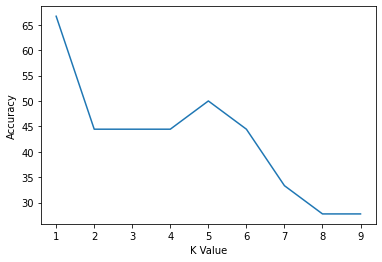

In [238]:
import matplotlib.pyplot as plt
plt.plot(k,acc)
plt.xlabel("K Value")
plt.ylabel("Accuracy")